# Capítulo 1. Análise Exploratória de Dados - Notas de Estudo

## 0.0 Imports

In [1]:
%matplotlib inline

from pathlib import Path

import pandas as pd
import numpy as np
from scipy.stats import trim_mean
from statsmodels import robust
import wquantiles

import seaborn as sns
import matplotlib.pylab as plt
import matplotlib
from matplotlib import gridspec

from IPython.display import Image
from IPython.core.display import HTML

In [2]:
try:
    import common
    DATA = common.dataDirectory()
except ImportError:
    DATA = Path().resolve() / 'data'

Define paths to data sets. If you don't keep your data in the same directory as the code, adapt the path names.

In [3]:
AIRLINE_STATS_CSV = DATA / 'airline_stats.csv'
KC_TAX_CSV = DATA / 'kc_tax.csv.gz'
LC_LOANS_CSV = DATA / 'lc_loans.csv'
AIRPORT_DELAYS_CSV = DATA / 'dfw_airline.csv'
SP500_DATA_CSV = DATA / 'sp500_data.csv.gz'
SP500_SECTORS_CSV = DATA / 'sp500_sectors.csv'
STATE_CSV = DATA / 'state.csv'

## 1.1 Estimativas de localização - Tendência Central

### Exemplo: Estimativas de localização da população e taxas de homicídio

In [4]:
# Table 1-2
state = pd.read_csv(STATE_CSV)
state.head(8)

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA
5,Colorado,5029196,2.8,CO
6,Connecticut,3574097,2.4,CT
7,Delaware,897934,5.8,DE


In [5]:
#quantidade de estados 
state.shape[0]

50

In [6]:
# populacao total
state['Population'].sum()

308143815

### Média simples

In [7]:
# Media simples pag-10
state = pd.read_csv(STATE_CSV)
print(state['Population'].mean())

6162876.3


### Média aparada

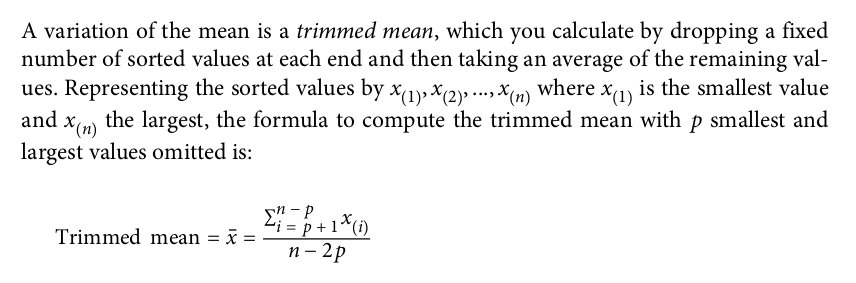

In [8]:
Image('/home/deivison/Documentos/projetos/stats/imagem/media_aparada_1.png')

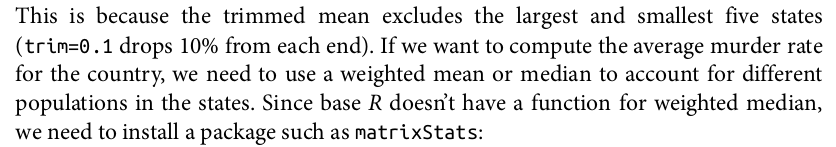

In [9]:
Image('/home/deivison/Documentos/projetos/stats/imagem/media_aparada_3.png')

In [10]:
#Media aparada pacote scipy --> Competicao de mergulhadores
print(trim_mean(state['Population'], 0.1))

4783697.125


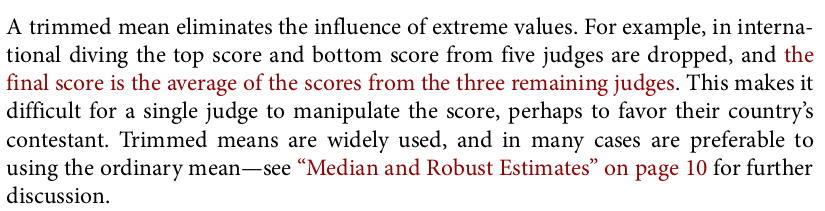

In [11]:
Image('/home/deivison/Documentos/projetos/stats/imagem/media_aparada_2.png')

### Mediana simples

In [12]:
print(state['Population'].median())

4436369.5


Weighted mean is available with numpy. For weighted median, we can use the specialised package `wquantiles` (https://pypi.org/project/wquantiles/).

### Média ponderada

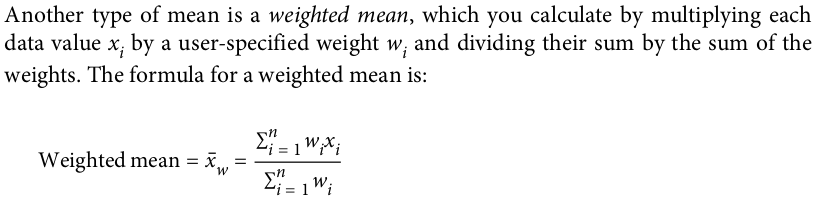

In [13]:
Image('/home/deivison/Documentos/projetos/stats/imagem/media_ponderada_1.png')

In [14]:
print(state['Murder.Rate'].mean())

4.066


Media ponderada da taxa de crimes
    cada estado americano tem uma taxa de homicidios 
    populações diferentes influencias diferentes no peso dos homicidios nacionais

In [15]:
# media ponderada no numpy -->  .average( data[], weigts = data[])
print(np.average(state['Murder.Rate'], weights=state['Population']))

4.445833981123393


In [16]:
# media ponderada no wquantiles --> .median( data[], weigts = data[] )
print(wquantiles.median(state['Murder.Rate'], weights=state['Population']))

4.4


## 1.2 Estimativas de Variabilidade - Dispersão

In [17]:
# Table 1-2
state.head(8)

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA
5,Colorado,5029196,2.8,CO
6,Connecticut,3574097,2.4,CT
7,Delaware,897934,5.8,DE


### Desvio Padrão

In [18]:
print(state['Population'].std())

6848235.347401142


### Amplitude interquartílica IQR

Interquartile range is calculated as the difference of the 75% and 25% quantile.

In [19]:
# metodo quantile do pandas --> .quantile(value)
print( state['Population'].quantile(0.75) - state['Population'].quantile(0.25) )

4847308.0


### Mediana dos Desvio Absolutos Medianos

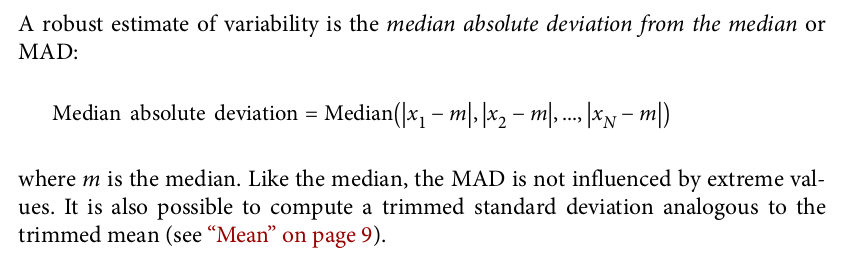

In [20]:
Image('/home/deivison/Documentos/projetos/stats/imagem/median_absolute_deviation.png')

Median absolute deviation from the median can be calculated with a method in _statsmodels_

In [21]:
# MAD --> pacote statsmodels --> robust.scale.mad( data[] )
# mediana dos desvios medianos absolutos
# Multiplica-se por um fator de escala (1/0.6744) para ajustar a conta ao mesmo resultado
print(robust.scale.mad(state['Population']))
print(abs( state['Population'] - state['Population'].median() ).median() / 0.6744897501960817 )

3849876.1459979336
3849876.1459979336


## 1.3 Explorando a Distribuição de Dados

### Percentis e Boxplots

In [22]:
state['Murder.Rate'].sort_values(ascending = True)

28     0.9
22     1.6
18     1.6
44     1.6
10     1.8
14     1.9
36     2.0
20     2.0
11     2.0
43     2.3
40     2.3
38     2.4
6      2.4
46     2.5
49     2.7
5      2.8
26     2.9
48     2.9
33     3.0
15     3.1
31     3.1
25     3.6
16     3.6
29     3.9
47     4.0
34     4.0
45     4.1
42     4.4
4      4.4
35     4.5
2      4.7
30     4.8
37     4.8
13     5.0
32     5.1
12     5.3
21     5.4
3      5.6
1      5.6
41     5.7
0      5.7
9      5.7
8      5.8
7      5.8
27     6.0
19     6.1
39     6.4
24     6.6
23     8.6
17    10.3
Name: Murder.Rate, dtype: float64

In [23]:
# metodo quantile do pandas --> .quantile(value)
print(state['Murder.Rate'].quantile([0.05, 0.25, 0.5, 0.75, 0.95]))

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64


In [24]:
# Table 1.4
percentages = [0.05, 0.25, 0.5, 0.75, 0.95]
df = pd.DataFrame(state['Murder.Rate'].quantile(percentages))
df.index = [f'{p * 100}%' for p in percentages]
print(df.transpose())

             5.0%  25.0%  50.0%  75.0%  95.0%
Murder.Rate   1.6  2.425    4.0   5.55   6.51


_Pandas_ provides a number of basic exploratory plots; one of them are boxplots

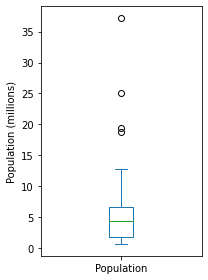

In [25]:
# boxplot com pandas
ax = (state['Population']/1_000_000).plot.box(figsize=(3, 4))
ax.set_ylabel('Population (millions)')

plt.tight_layout()
plt.show()

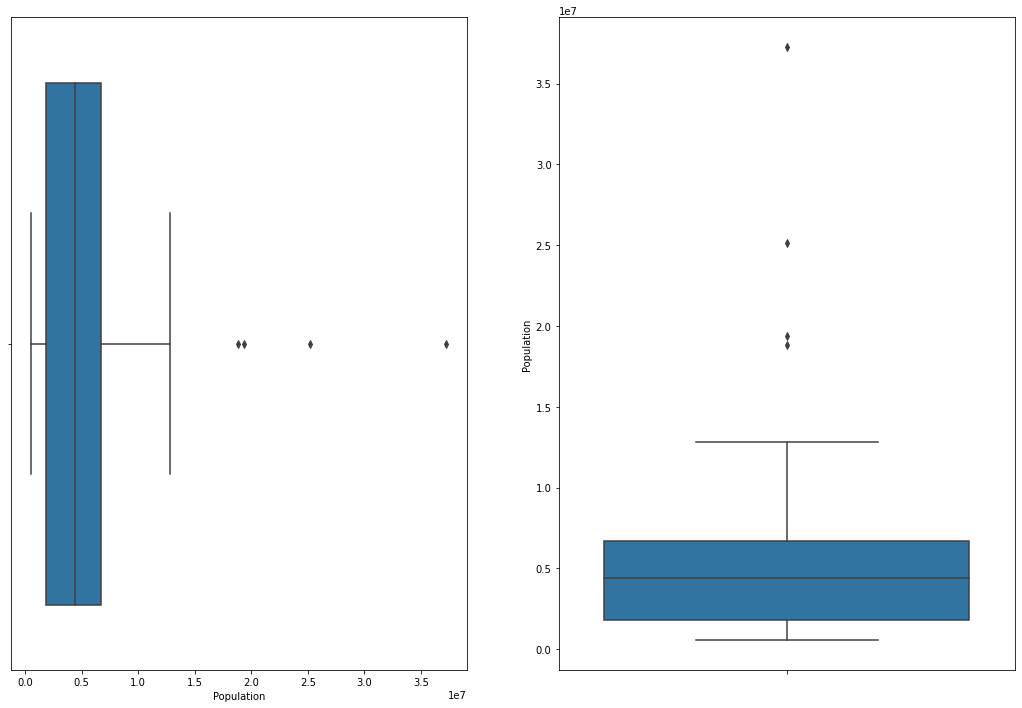

In [26]:
# boxplot method in seaborn
fig = plt.figure(figsize=(18,12) )
specs = gridspec.GridSpec( nrows = 1, ncols = 2, figure = fig )
ax1 = fig.add_subplot( specs[0,0])
ax2 = fig.add_subplot( specs[0,1])

sns.boxplot(data = state, x = 'Population', ax = ax1 );

sns.boxplot(data = state, y = 'Population', ax = ax2);

### Tabela de Frequencia e Histogramas

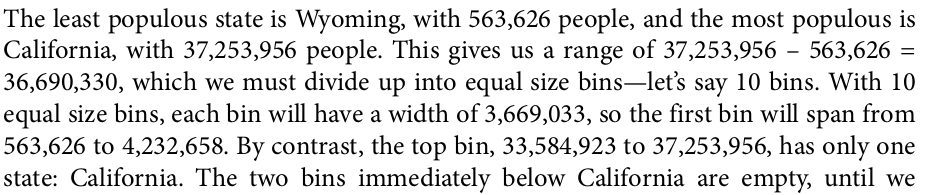

In [27]:
Image('/home/deivison/Documentos/projetos/stats/imagem/tabela_de_frequencia.png')

In [28]:
# metodo cut divide a coluna do dataset em bins --> população divida em 10 bins
binnedPopulation = pd.cut(state['Population'], 10)
binnedPopulation.value_counts()

(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(15239758.0, 18908791.0]     1
(18908791.0, 22577824.0]     1
(22577824.0, 26246857.0]     1
(33584923.0, 37253956.0]     1
(26246857.0, 29915890.0]     0
(29915890.0, 33584923.0]     0
Name: Population, dtype: int64

In [29]:
#cada estado e o seu respectivo bin
binnedPopulation

0       (4232659.0, 7901692.0]
1       (526935.67, 4232659.0]
2       (4232659.0, 7901692.0]
3       (526935.67, 4232659.0]
4     (33584923.0, 37253956.0]
5       (4232659.0, 7901692.0]
6       (526935.67, 4232659.0]
7       (526935.67, 4232659.0]
8     (15239758.0, 18908791.0]
9      (7901692.0, 11570725.0]
10      (526935.67, 4232659.0]
11      (526935.67, 4232659.0]
12    (11570725.0, 15239758.0]
13      (4232659.0, 7901692.0]
14      (526935.67, 4232659.0]
15      (526935.67, 4232659.0]
16      (4232659.0, 7901692.0]
17      (4232659.0, 7901692.0]
18      (526935.67, 4232659.0]
19      (4232659.0, 7901692.0]
20      (4232659.0, 7901692.0]
21     (7901692.0, 11570725.0]
22      (4232659.0, 7901692.0]
23      (526935.67, 4232659.0]
24      (4232659.0, 7901692.0]
25      (526935.67, 4232659.0]
26      (526935.67, 4232659.0]
27      (526935.67, 4232659.0]
28      (526935.67, 4232659.0]
29     (7901692.0, 11570725.0]
30      (526935.67, 4232659.0]
31    (18908791.0, 22577824.0]
32     (

In [30]:
state[['State','Population']]

,State,Population
0,Alabama,4779736
1,Alaska,710231
2,Arizona,6392017
3,Arkansas,2915918
4,California,37253956
5,Colorado,5029196
6,Connecticut,3574097
7,Delaware,897934
8,Florida,18801310
9,Georgia,9687653


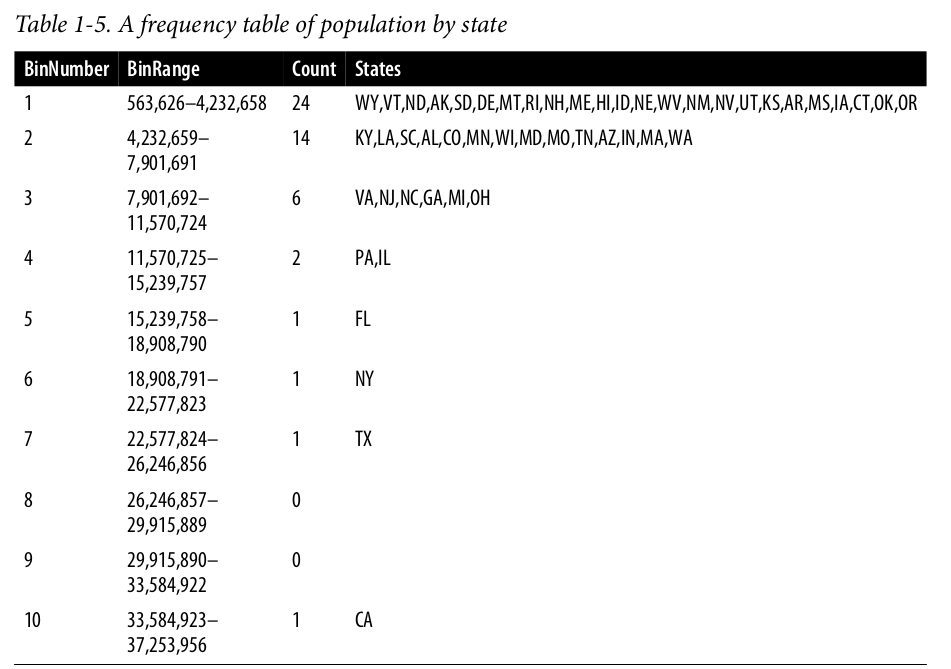

In [31]:
Image('/home/deivison/Documentos/projetos/stats/imagem/tabela_de_frequencia_2.png')

In [32]:
# Table 1.5
binnedPopulation = pd.cut(state['Population'], 10)
binnedPopulation.name = 'binnedPopulation'
df = pd.concat([state, binnedPopulation], axis=1)
df = df.sort_values(by='Population')

groups = []
for group, subset in df.groupby(by='binnedPopulation'):
    groups.append({
        'BinRange': group,
        'Count': len(subset),
        'States': ','.join(subset.Abbreviation)
    })
print(pd.DataFrame(groups))

                   BinRange  Count  \
0    (526935.67, 4232659.0]     24   
1    (4232659.0, 7901692.0]     14   
2   (7901692.0, 11570725.0]      6   
3  (11570725.0, 15239758.0]      2   
4  (15239758.0, 18908791.0]      1   
5  (18908791.0, 22577824.0]      1   
6  (22577824.0, 26246857.0]      1   
7  (26246857.0, 29915890.0]      0   
8  (29915890.0, 33584923.0]      0   
9  (33584923.0, 37253956.0]      1   

                                              States  
0  WY,VT,ND,AK,SD,DE,MT,RI,NH,ME,HI,ID,NE,WV,NM,N...  
1          KY,LA,SC,AL,CO,MN,WI,MD,MO,TN,AZ,IN,MA,WA  
2                                  VA,NJ,NC,GA,MI,OH  
3                                              PA,IL  
4                                                 FL  
5                                                 NY  
6                                                 TX  
7                                                     
8                                                     
9                              

In [33]:
pd.DataFrame(groups)

,BinRange,Count,States
0,"(526935.67, 4232659.0]",24,"WY,VT,ND,AK,SD,DE,MT,RI,NH,ME,HI,ID,NE,WV,NM,N..."
1,"(4232659.0, 7901692.0]",14,"KY,LA,SC,AL,CO,MN,WI,MD,MO,TN,AZ,IN,MA,WA"
2,"(7901692.0, 11570725.0]",6,"VA,NJ,NC,GA,MI,OH"
3,"(11570725.0, 15239758.0]",2,"PA,IL"
4,"(15239758.0, 18908791.0]",1,FL
5,"(18908791.0, 22577824.0]",1,NY
6,"(22577824.0, 26246857.0]",1,TX
7,"(26246857.0, 29915890.0]",0,
8,"(29915890.0, 33584923.0]",0,
9,"(33584923.0, 37253956.0]",1,CA


_Pandas_ also supports histograms for exploratory data analysis.

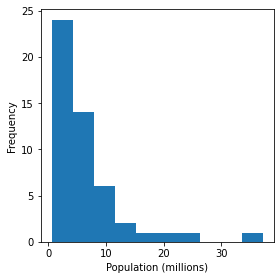

In [34]:
# Histograma
#     Grafico para representar uma unica variavel numerica 
#     eixo x representa os valores de uma unica variavel em uma escala numerica
#     A frequencia esta no eixo y 
#         --> as barras tocam uma na outra 
#         --> espaços entre barras --> correspondem a barras vazias
        
ax = (state['Population'] / 1_000_000).plot.hist(figsize=(4, 4))
ax.set_xlabel('Population (millions)')

plt.tight_layout()
plt.show()

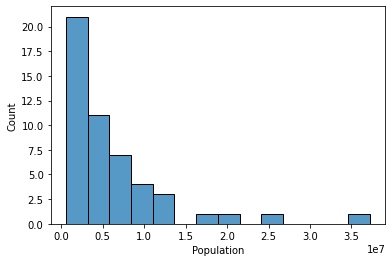

In [35]:
sns.histplot(x = 'Population' ,data = state);

### Estimativas de Densidade

Density is an alternative to histograms that can provide more insight into the distribution of the data points. Use the argument `bw_method` to control the smoothness of the density curve.

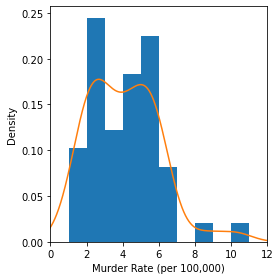

In [36]:
ax = state['Murder.Rate'].plot.hist(density=True, xlim=[0, 12], 
                                    bins=range(1,12), figsize=(4, 4))
state['Murder.Rate'].plot.density(ax=ax)
ax.set_xlabel('Murder Rate (per 100,000)')

plt.tight_layout()
plt.show()

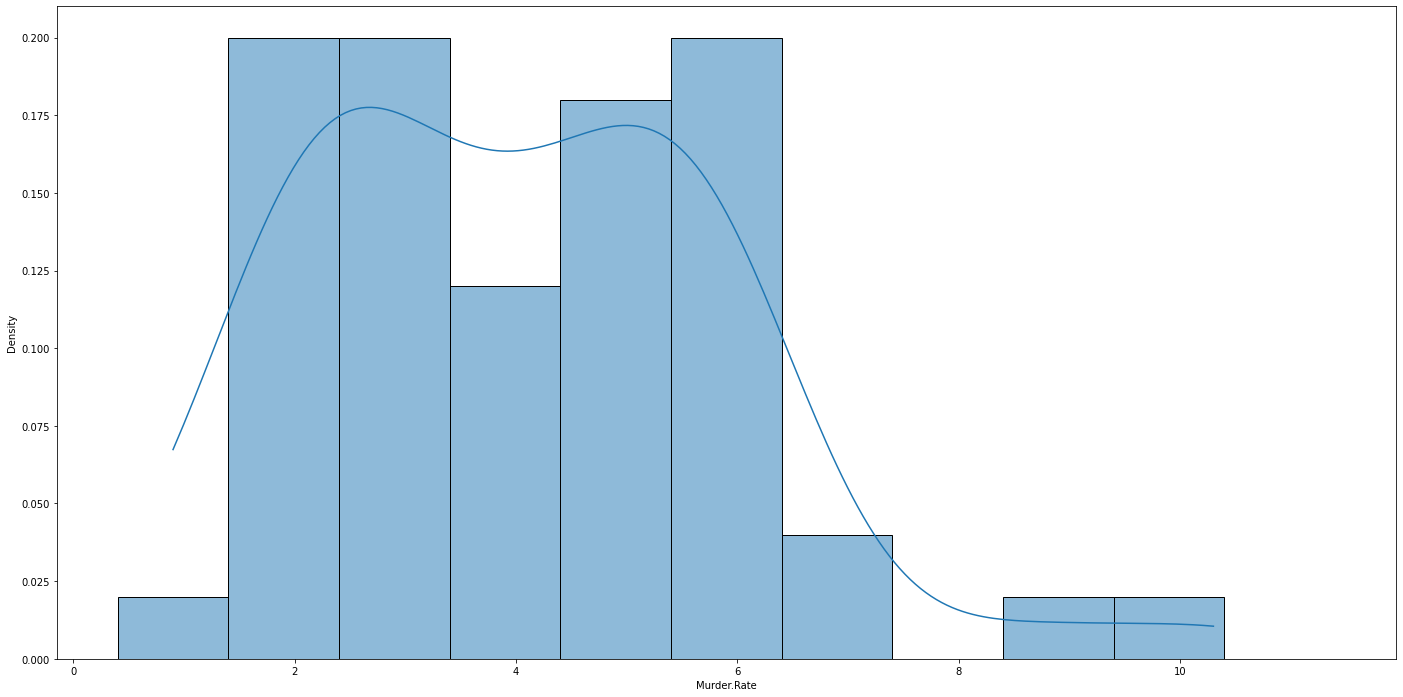

In [37]:
fig = plt.figure( figsize = (24,12) )
specs = gridspec.GridSpec( ncols = 1, nrows = 1, figure = fig )

ax1 = fig.add_subplot( specs[ 0,0] )

sns.histplot(x = 'Murder.Rate', data = state, kde = True, stat = 'density', bins=range(1,12),  discrete = True, ax = ax1);

## 1.4 Explorando Dados Binários e Categóricos

In [38]:
# Table 1-6
dfw = pd.read_csv(AIRPORT_DELAYS_CSV)
print(100 * dfw / dfw.values.sum())

     Carrier        ATC   Weather  Security    Inbound
0  23.022989  30.400781  4.025214  0.122937  42.428079


_Pandas_ also supports bar charts for displaying a single categorical variable.

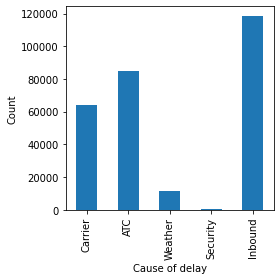

In [39]:
# graficos de barras
#     Exibem uma unica variavel categorica
#     cada categoria é uma barra no eixo x
#     A frequencia ou porcentagem/proporção é colocada no eixo y
#     Barras sao separadas umas das outras
    
ax = dfw.transpose().plot.bar(figsize=(4, 4), legend=False)
ax.set_xlabel('Cause of delay')
ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

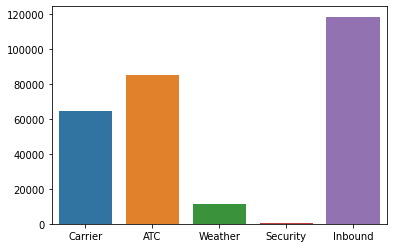

In [40]:
# Seaborn method
sns.barplot(data = dfw, orient = 'v');

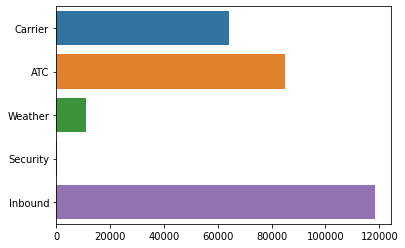

In [41]:
sns.barplot(data = dfw, orient = 'h');

## 1.5 Correlação

In [42]:
sp500_sym = pd.read_csv(SP500_SECTORS_CSV)
sp500_px = pd.read_csv(SP500_DATA_CSV, index_col=0)

In [43]:
# Table 1-7
# Determine telecommunications symbols
telecomSymbols = sp500_sym[sp500_sym['sector'] == 'telecommunications_services']['symbol']

# Filter data for dates July 2012 through June 2015
telecom = sp500_px.loc[sp500_px.index >= '2012-07-01', telecomSymbols]
telecom.corr()
telecom

,T,CTL,FTR,VZ,LVLT
2012-07-02,0.422496,0.140847,0.070879,0.554180,-0.519998
2012-07-03,-0.177448,0.066280,0.070879,-0.025976,-0.049999
2012-07-05,-0.160548,-0.132563,0.055128,-0.051956,-0.180000
2012-07-06,0.342205,0.132563,0.007875,0.140106,-0.359999
2012-07-09,0.136883,0.124279,-0.023626,0.253943,0.180000
...,...,...,...,...,...
2015-06-25,0.049342,-1.600000,-0.040000,-0.187790,-0.330002
2015-06-26,-0.256586,0.039999,-0.070000,0.029650,-0.739998
2015-06-29,-0.098685,-0.559999,-0.060000,-0.504063,-1.360000
2015-06-30,-0.503298,-0.420000,-0.070000,-0.523829,0.199997


In [44]:
telecom

,T,CTL,FTR,VZ,LVLT
2012-07-02,0.422496,0.140847,0.070879,0.554180,-0.519998
2012-07-03,-0.177448,0.066280,0.070879,-0.025976,-0.049999
2012-07-05,-0.160548,-0.132563,0.055128,-0.051956,-0.180000
2012-07-06,0.342205,0.132563,0.007875,0.140106,-0.359999
2012-07-09,0.136883,0.124279,-0.023626,0.253943,0.180000
...,...,...,...,...,...
2015-06-25,0.049342,-1.600000,-0.040000,-0.187790,-0.330002
2015-06-26,-0.256586,0.039999,-0.070000,0.029650,-0.739998
2015-06-29,-0.098685,-0.559999,-0.060000,-0.504063,-1.360000
2015-06-30,-0.503298,-0.420000,-0.070000,-0.523829,0.199997


In [45]:
telecomSymbols

332       T
333     CTL
334     FTR
335      VZ
336    LVLT
Name: symbol, dtype: object

Next we focus on funds traded on major exchanges (sector == 'etf'). 

In [46]:
etfs = sp500_px.loc[sp500_px.index > '2012-07-01', 
                    sp500_sym[sp500_sym['sector'] == 'etf']['symbol']]
etfs.head()

,XLI,QQQ,SPY,DIA,GLD,VXX,USO,IWM,XLE,XLY,XLU,XLB,XTL,XLV,XLP,XLF,XLK
2012-07-02,-0.376098,0.096313,0.028223,-0.242796,0.419998,-10.40,0.000000,0.534641,0.028186,0.095759,0.098311,-0.093713,0.019076,-0.009529,0.313499,0.018999,0.075668
2012-07-03,0.376099,0.481576,0.874936,0.728405,0.490006,-3.52,0.250000,0.926067,0.995942,0.000000,-0.044686,0.337373,0.000000,0.000000,0.129087,0.104492,0.236462
2012-07-05,0.150440,0.096313,-0.103487,0.149420,0.239991,6.56,-0.070000,-0.171848,-0.460387,0.306431,-0.151938,0.103086,0.019072,-0.142955,-0.073766,-0.142490,0.066211
2012-07-06,-0.141040,-0.491201,0.018819,-0.205449,-0.519989,-8.80,-0.180000,-0.229128,0.206706,0.153214,0.080437,0.018744,-0.429213,-0.095304,0.119865,0.066495,-0.227003
2012-07-09,0.244465,-0.048160,-0.056445,-0.168094,0.429992,-0.48,0.459999,-0.190939,-0.234892,-0.201098,-0.035751,-0.168687,0.000000,0.352630,-0.064548,0.018999,0.009457


Devido ao grande número de colunas nesta tabela, observar a matriz de correlação é complicado e é mais conveniente plotar a correlação como um mapa de calor. O pacote seaborn fornece uma implementação conveniente para mapas de calor.

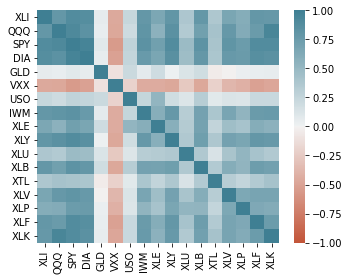

In [47]:
fig, ax = plt.subplots(figsize=(5, 4))
ax = sns.heatmap(etfs.corr(), vmin=-1, vmax=1, 
                 cmap=sns.diverging_palette(20, 220, as_cmap=True),
                 ax=ax)

plt.tight_layout()
plt.show()

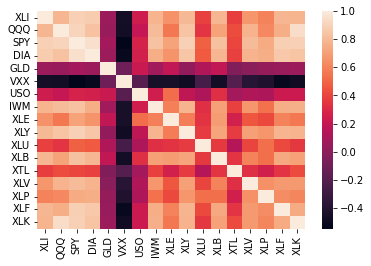

In [48]:
sns.heatmap( etfs.corr(), data = telecom );

O mapa de calor acima funciona quando você tem cores. Para as imagens em escala de cinza, conforme usadas no livro, precisamos visualizar a direção também. 

O código a seguir mostra a força da correlação usando elipses.

/tmp/ipykernel_74870/1767497109.py:38: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  cb = fig.colorbar(m)


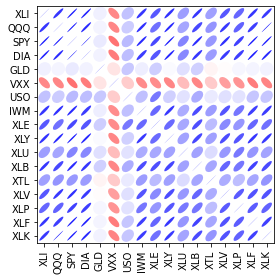

In [49]:
from matplotlib.collections import EllipseCollection
from matplotlib.colors import Normalize

def plot_corr_ellipses(data, figsize=None, **kwargs):
    ''' https://stackoverflow.com/a/34558488 '''
    M = np.array(data)
    if not M.ndim == 2:
        raise ValueError('data must be a 2D array')
    fig, ax = plt.subplots(1, 1, figsize=figsize, subplot_kw={'aspect':'equal'})
    ax.set_xlim(-0.5, M.shape[1] - 0.5)
    ax.set_ylim(-0.5, M.shape[0] - 0.5)
    ax.invert_yaxis()

    # xy locations of each ellipse center
    xy = np.indices(M.shape)[::-1].reshape(2, -1).T

    # set the relative sizes of the major/minor axes according to the strength of
    # the positive/negative correlation
    w = np.ones_like(M).ravel() + 0.01
    h = 1 - np.abs(M).ravel() - 0.01
    a = 45 * np.sign(M).ravel()

    ec = EllipseCollection(widths=w, heights=h, angles=a, units='x', offsets=xy,
                           norm=Normalize(vmin=-1, vmax=1),
                           transOffset=ax.transData, array=M.ravel(), **kwargs)
    ax.add_collection(ec)

    # if data is a DataFrame, use the row/column names as tick labels
    if isinstance(data, pd.DataFrame):
        ax.set_xticks(np.arange(M.shape[1]))
        ax.set_xticklabels(data.columns, rotation=90)
        ax.set_yticks(np.arange(M.shape[0]))
        ax.set_yticklabels(data.index)

    return ec

m = plot_corr_ellipses(etfs.corr(), figsize=(5, 4), cmap='bwr_r')
cb = fig.colorbar(m)
cb.set_label('Correlation coefficient')

plt.tight_layout()
plt.show()

### Gráficos de dispersão - Scatterplots

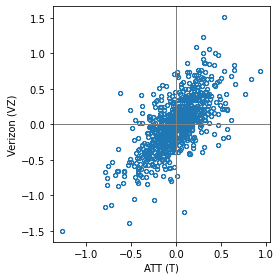

In [50]:
ax = telecom.plot.scatter(x='T', y='VZ', figsize=(4, 4), marker='$\u25EF$')
ax.set_xlabel('ATT (T)')
ax.set_ylabel('Verizon (VZ)')
ax.axhline(0, color='grey', lw=1)
ax.axvline(0, color='grey', lw=1)

plt.tight_layout()
plt.show()

Line2D(_child2)


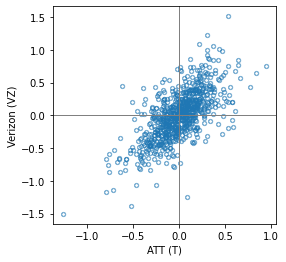

In [51]:
ax = telecom.plot.scatter(x='T', y='VZ', figsize=(4, 4), marker='$\u25EF$', alpha=0.5)
ax.set_xlabel('ATT (T)')
ax.set_ylabel('Verizon (VZ)')
ax.axhline(0, color='grey', lw=1)
print(ax.axvline(0, color='grey', lw=1))

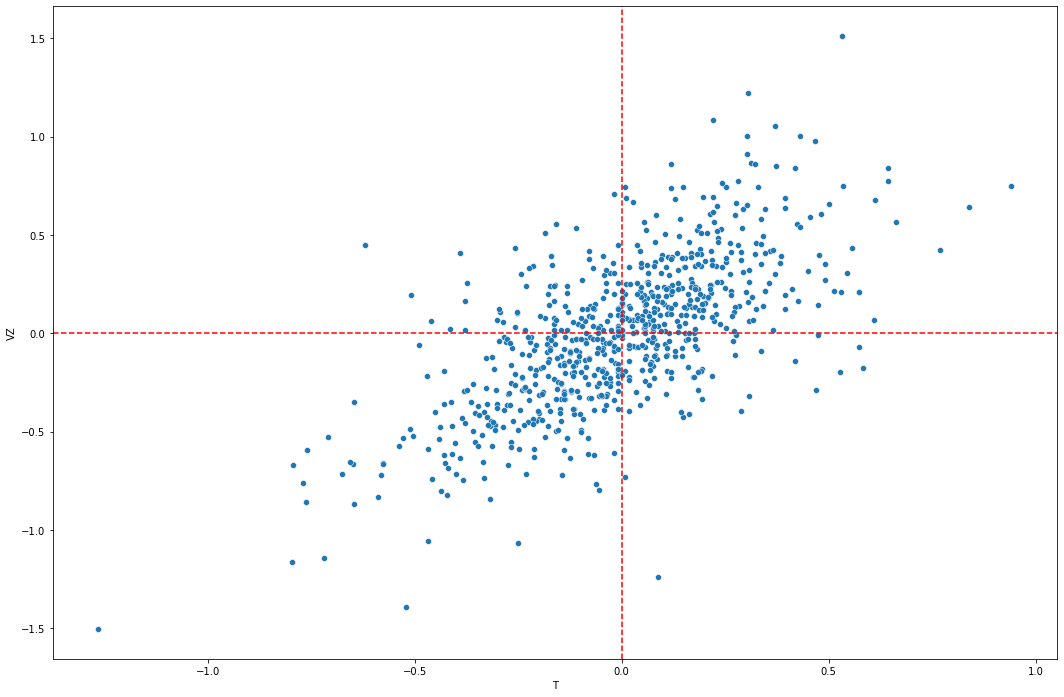

In [52]:
fig = plt.figure(figsize=(18,12) )
specs = gridspec.GridSpec( nrows = 1, ncols = 1, figure = fig )
ax1 = fig.add_subplot( specs[0,0])

sns.scatterplot(data = telecom, x='T', y='VZ', ax = ax1);
ax1.axvline(x = 0, color='r', linestyle = '--');
ax1.axhline(y = 0, color='r', linestyle = '--');

## 1.6 Explorando Duas ou mais Variáveis

Load the kc_tax dataset and filter based on a variety of criteria

In [53]:
# filtragem do dataset para python gerar graficos mais rapidos 
#     foram excluidos os imoveis muitos caros e as residencias muito baratas

kc_tax = pd.read_csv(KC_TAX_CSV)
kc_tax0 = kc_tax.loc[(kc_tax.TaxAssessedValue < 750000) & 
                     (kc_tax.SqFtTotLiving > 100) &
                     (kc_tax.SqFtTotLiving < 3500), :]
print(kc_tax0.shape)

(432693, 3)


### Compartimentação Hexagonal e Contornos - Plotting numeric versus numeric data

If the number of data points gets large, scatter plots will no longer be meaningful. Here methods that visualize densities are more useful. The `hexbin` method for _pandas_ data frames is one powerful approach.

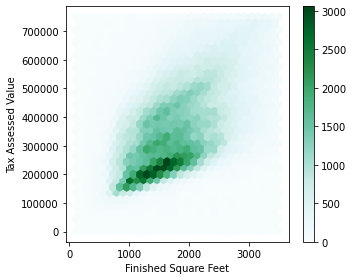

In [54]:
ax = kc_tax0.plot.hexbin(x='SqFtTotLiving', y='TaxAssessedValue',
                         gridsize=30, sharex=False, figsize=(5, 4))
ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax Assessed Value')

plt.tight_layout()
plt.show()

For data sets with hundreds of thousands or millions of records, a scatterplot will be too dense, so we need a different way to visualize the relationship.

**Gráfico de compartimento Hexagonal**

Relação entre o valor do metro quadrado de um imóvel versus  valor do imposto    
    
* Cada hexagono 
   
    * Representa um espaço que cabem de zero até 3000 observações.  
    * A cor do hexagono igual a quantidade observada
 
* Eixos mostram a relação entre 
    
    * Valor do imposto (y) e o valor dos metros quadrados (x)
        
* Representação das retas imaginárias se dá pela tonalidade.
    
    * Há uma reta verde escura mais forte
        
    * Outra mais sutil sobre a de cima 
        
        * Indicando uma segunda nuvem de pontos sobre a principal

        * Residencias com mesma metragem, porém com observações de impostos em duas regiões diferentes
                
**Hexagonal binning and contour plots are useful tools that permit graphical examination of two numeric variables at a time, without being overwhelmed by huge amounts of data.**
    

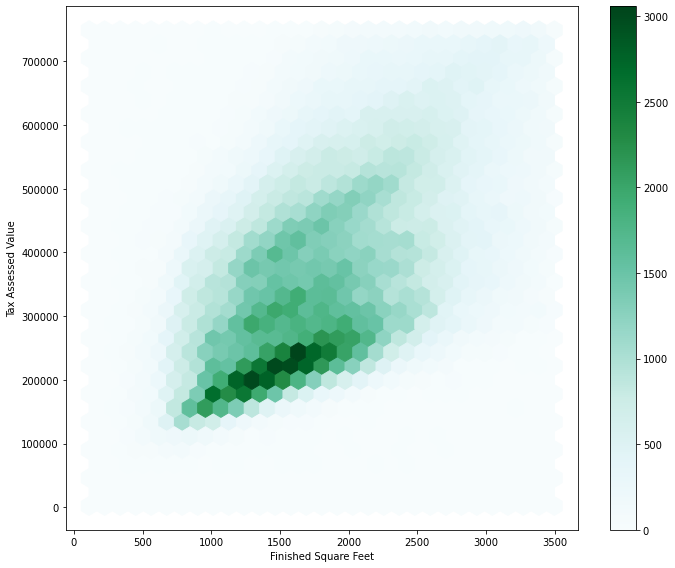

In [55]:
ax = kc_tax0.plot.hexbin(x='SqFtTotLiving', y='TaxAssessedValue',
                         gridsize=30, sharex=False, figsize=(10, 8))
ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax Assessed Value')

plt.tight_layout()
plt.show()

The _seaborn_ kdeplot is a two-dimensional extension of the density plot. The calculation of the 2D-density for the full dataset takes several minutes. It is sufficient to create the visualization with a smaller sample of the dataset. With 10,000 data points, creating the graph takes only seconds. While some details may be lost, the overall shape is preserved. 

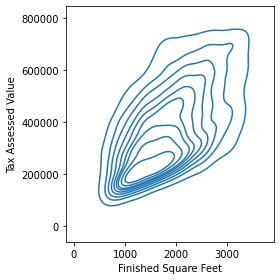

In [56]:
fig, ax = plt.subplots(figsize=(4, 4))
sns.kdeplot(data=kc_tax0.sample(10000), x='SqFtTotLiving', y='TaxAssessedValue', ax=ax)
ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax Assessed Value')

plt.tight_layout()
plt.show()

For data sets with hundreds of thousands or millions of records, a scatterplot will be too dense, so we need a different way to visualize the relationship.

**Gráfico de contorno (curvas de níveis)**

Relação entre o valor do metro quadrado de um imóvel versus  valor do imposto    
    
* Cada linha  
   
    * Representa uma densidade de pontos de observação.
    * Linhas mais próximas indicam regiões com picos de concentração
 
* Eixos mostram a relação entre 
    * Valor do imposto (y) e o valor dos metros quadrados (x)
        
* Representação das retas imaginárias se dá pelas proximidades das linhas.
    
    * Há muitas retas proximas em uma região
        
    * Outra retas próximas com menos intensidade acima 
        
        * indicando uma segunda nuvem de pontos sobre a principal

        * Residencias com mesma metragem, porém com observações de impostos em duas regiões diferentes
    

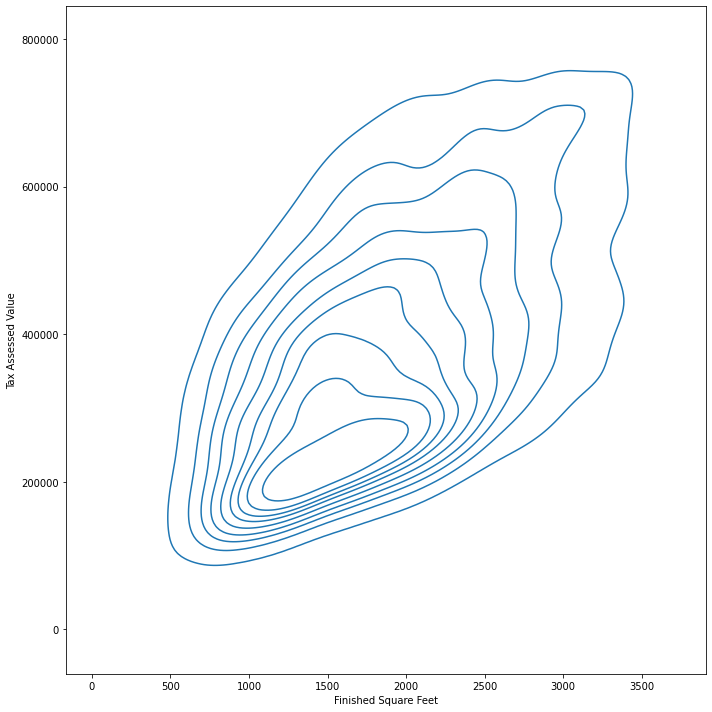

In [57]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.kdeplot(data=kc_tax0.sample(10000), x='SqFtTotLiving', y='TaxAssessedValue', ax=ax)
ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax Assessed Value')

plt.tight_layout()
plt.show()

### Duas Variáveis Categóricas

In [58]:
lc_loans = pd.read_csv(LC_LOANS_CSV)

### Dimensão do dataframe

In [59]:
lc_loans.shape

(450961, 2)

In [60]:
lc_loans.head(10)

,status,grade
0,Fully Paid,B
1,Charged Off,C
2,Fully Paid,C
3,Fully Paid,C
4,Current,B
5,Fully Paid,A
6,Current,C
7,Fully Paid,E
8,Charged Off,F
9,Charged Off,B


### Variáveis Categórias e os seus respectivos tipos

In [61]:
lc_loans['status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Late'], dtype=object)

In [62]:
lc_loans['grade'].unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

### Tabela de contingência 

A useful way to summarize two categorical variables is a contingency table—a table of
counts by category. 

Table 1-8 shows the contingency table between the ***grade of a personal loan*** and the ***outcome of that loan***. 

This is taken from data provided by Lending Club, a leader in the peer-to-peer lending business.

The grade goes from A (high) to G (low).
The outcome is either fully paid, current, late, or charged off.

Contingency tables are the standard tool for looking at the counts of two categorical variables.

In [63]:
# Table 1-8(1)
crosstab = lc_loans.pivot_table(index='grade', columns='status', 
                                aggfunc=lambda x: len(x), margins=True)
crosstab

status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,1562,50051,20408,469,72490
B,5302,93852,31160,2056,132370
C,6023,88928,23147,2777,120875
D,5007,53281,13681,2308,74277
E,2842,24639,5949,1374,34804
F,1526,8444,2328,606,12904
G,409,1990,643,199,3241
All,22671,321185,97316,9789,450961


In [64]:
# Table 1-8(2)
df = crosstab.copy().loc['A':'G',:]
df.loc[:,'Charged Off':'Late'] = df.loc[:,'Charged Off':'Late'].div(df['All'], axis=0)
df['All'] = df['All'] / sum(df['All'])
perc_crosstab = df
perc_crosstab

status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,0.021548,0.690454,0.281528,0.006470,0.160746
B,0.040054,0.709013,0.235401,0.015532,0.293529
C,0.049828,0.735702,0.191495,0.022974,0.268039
D,0.067410,0.717328,0.184189,0.031073,0.164708
E,0.081657,0.707936,0.170929,0.039478,0.077177
F,0.118258,0.654371,0.180409,0.046962,0.028614
G,0.126196,0.614008,0.198396,0.061401,0.007187


### Dados Categóricos e Numéricos

#### Boxplot

Boxplot are a simple way to visually compare the distributions of a numeric variable grouped according to a categorical variable.

For example, we might want to compare how the percentage of flight delays varies across airlines.

Figure shows the percentage of flights in a month that were delayed where the delay was within the carrier’s control:

Alaska stands out as having the fewest delays, while American has the most delays:
the lower quartile for American is higher than the upper quartile for Alaska

Gráficos boxplot 

***Sempre mostrar junto com o boxplot o quanto cada categoria representa em % com relação ao todo.***

Quantos voos cada compania faz também é relevante na análise.

Boxplots and violin plots allow you to plot a numeric variable against a categorical variable.

In [65]:
airline_stats = pd.read_csv(AIRLINE_STATS_CSV)
airline_stats.head()

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
0,8.153226,1.971774,0.762097,American
1,5.959924,3.706107,1.585878,American
2,7.157270,2.706231,2.026706,American
3,12.100000,11.033333,0.000000,American
4,7.333333,3.365591,1.774194,American


In [66]:
airline_stats.shape

(33468, 4)

In [67]:
airline_stats['airline'].unique()

array(['American', 'Alaska', 'Jet Blue', 'Delta', 'United', 'Southwest'],
      dtype=object)

In [68]:
aux1 = airline_stats[['pct_carrier_delay', 'airline']].groupby('airline').sum().reset_index()
aux1.sort_values('airline',ascending = True)

,airline,pct_carrier_delay
0,Alaska,13562.794234
1,American,51748.395439
2,Delta,57602.814981
3,Jet Blue,30492.793010
4,Southwest,42002.831346
5,United,40057.281107


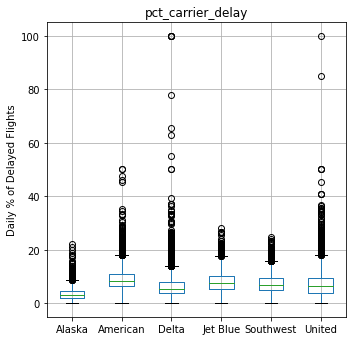

In [69]:
airline_stats = pd.read_csv(AIRLINE_STATS_CSV)
airline_stats.head()
ax = airline_stats.boxplot(by='airline', column='pct_carrier_delay',
                           figsize=(5, 5))
ax.set_xlabel('')
ax.set_ylabel('Daily % of Delayed Flights')
plt.suptitle('')

plt.tight_layout()
plt.show()

_Pandas_ also supports a variation of boxplots called _violinplot_. 

#### Violinplot

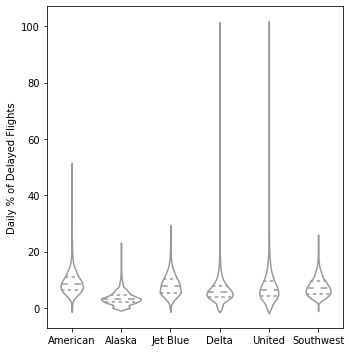

In [70]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.violinplot(data=airline_stats, x='airline', y='pct_carrier_delay',
               ax=ax, inner='quartile', color='white')
ax.set_xlabel('')
ax.set_ylabel('Daily % of Delayed Flights')

plt.tight_layout()
plt.show()

### Visualizando Múltiplas Variáveis

In [71]:
zip_codes = [98188, 98105, 98108, 98126]
kc_tax_zip = kc_tax0.loc[kc_tax0.ZipCode.isin(zip_codes),:]
kc_tax_zip

,TaxAssessedValue,SqFtTotLiving,ZipCode
3,361000.0,2000,98108.0
4,459000.0,3150,98108.0
10,202000.0,830,98108.0
11,210000.0,1130,98108.0
12,193000.0,1560,98108.0
...,...,...,...
498049,346000.0,1430,98105.0
498050,463000.0,1610,98105.0
498051,553000.0,1580,98105.0
498052,571000.0,1840,98105.0


As an example, look back at Figure 1-8, which showed the relationship between homes’ finished square feet and their tax-assessed values.

We observed that there appears to be a cluster of homes that have higher tax-assessed value per square foot.

Diving deeper, Figure 1-12 accounts for the effect of location by plotting the data for a set of zip codes.

Now the picture is much clearer: tax-assessed value is much higher in some zip codes (98105, 98126) than in others (98108, 98188). 

This disparity gives rise to the clusters observed in Figure 1-8.

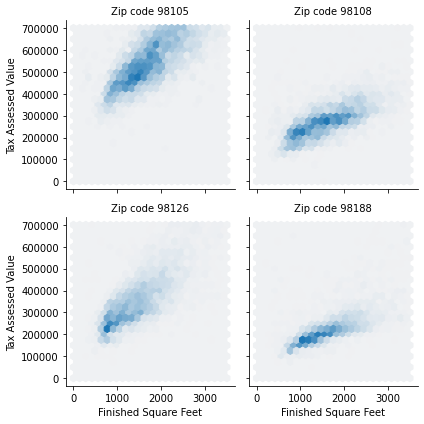

In [72]:
zip_codes = [98188, 98105, 98108, 98126]
kc_tax_zip = kc_tax0.loc[kc_tax0.ZipCode.isin(zip_codes),:]
kc_tax_zip

def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=25, cmap=cmap, **kwargs)

g = sns.FacetGrid(kc_tax_zip, col='ZipCode', col_wrap=2)
g.map(hexbin, 'SqFtTotLiving', 'TaxAssessedValue', 
      extent=[0, 3500, 0, 700000])
g.set_axis_labels('Finished Square Feet', 'Tax Assessed Value')
g.set_titles('Zip code {col_name:.0f}')

plt.tight_layout()
plt.show()

Hexagonal binning and contour plots are useful tools that permit graphical examination of two numeric variables at a time, without being overwhelmed by huge amounts of data.

Contingency tables are the standard tool for looking at the counts of two categorical variables.

Boxplots and violin plots allow you to plot a numeric variable against a categorical variable.